In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
matplotlib.__version__

'3.7.1'

In [89]:
# I had to completely rework my dataset because the previous one did not have the 'won_by' column
# This was pivotal to answer the questions I was pondering. 
# I had to combine the raw datasets via excel to get all the variables required to carry this out.

In [3]:
df = pd.read_excel(r'/Users/amykillin/Desktop/Mark Career Foundry Data/Data Immersion/Topic 6/UFC Archive 1993-2021/UFC Remixes/UFC_Complete_Sheet_for_Pandas.xlsx', index_col = False)

In [4]:
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_Landed,R_SIG_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,...,B_CTRL,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41,103,23,51,41,103,...,00:00:00,KO/TKO,3,00:27:00,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27,57,32,67,43,73,...,04:15:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14,18,2,6,14,18,...,00:00:00,KO/TKO,1,00:49:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31,65,15,41,49,87,...,09:53:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30,63,51,138,59,93,...,03:48:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4,6,1,3,20,22,...,--,Submission,1,09:51:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8,12,2,6,11,15,...,--,KO/TKO,1,02:50:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11,17,4,5,74,86,...,--,KO/TKO,1,12:13:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,1,1,1,...,--,Submission,1,00:58:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


In [5]:
df.dtypes

R_fighter             object
B_fighter             object
R_KD                   int64
B_KD                   int64
R_SIG_STR_Landed       int64
R_SIG_STR_Thrown       int64
B_SIG_STR_Landed       int64
B_SIG_STR_Thrown       int64
R_TOTAL_STR_Landed     int64
R_TOTAL_STR_Thrown     int64
B_TOTAL_STR_Landed     int64
B_TOTAL_STR_Thrown     int64
R_TD_Secured           int64
R_TD_Attempted         int64
B_TD_Secured           int64
B_TD_Attempted         int64
R_SUB_ATT              int64
B_SUB_ATT              int64
R_REV                  int64
B_REV                  int64
R_CTRL                object
B_CTRL                object
win_by                object
last_round             int64
last_round_time       object
Format                object
Referee               object
date                  object
location              object
Fight_type            object
Winner                object
dtype: object

In [6]:
df = df.drop(columns = ['Referee'])

In [7]:
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_Landed,R_SIG_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,...,R_CTRL,B_CTRL,win_by,last_round,last_round_time,Format,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41,103,23,51,41,103,...,00:03:00,00:00:00,KO/TKO,3,00:27:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27,57,32,67,43,73,...,01:15:00,04:15:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14,18,2,6,14,18,...,00:10:00,00:00:00,KO/TKO,1,00:49:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31,65,15,41,49,87,...,01:04:00,09:53:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30,63,51,138,59,93,...,02:15:00,03:48:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4,6,1,3,20,22,...,--,--,Submission,1,09:51:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8,12,2,6,11,15,...,--,--,KO/TKO,1,02:50:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11,17,4,5,74,86,...,--,--,KO/TKO,1,12:13:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,1,1,1,...,--,--,Submission,1,00:58:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


In [8]:
# Check again for missing values

df.isnull().sum() 

R_fighter               0
B_fighter               0
R_KD                    0
B_KD                    0
R_SIG_STR_Landed        0
R_SIG_STR_Thrown        0
B_SIG_STR_Landed        0
B_SIG_STR_Thrown        0
R_TOTAL_STR_Landed      0
R_TOTAL_STR_Thrown      0
B_TOTAL_STR_Landed      0
B_TOTAL_STR_Thrown      0
R_TD_Secured            0
R_TD_Attempted          0
B_TD_Secured            0
B_TD_Attempted          0
R_SUB_ATT               0
B_SUB_ATT               0
R_REV                   0
B_REV                   0
R_CTRL                  0
B_CTRL                  0
win_by                  0
last_round              0
last_round_time         0
Format                  0
date                    0
location                0
Fight_type              0
Winner                110
dtype: int64

In [9]:
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_Landed,R_SIG_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,...,R_CTRL,B_CTRL,win_by,last_round,last_round_time,Format,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41,103,23,51,41,103,...,00:03:00,00:00:00,KO/TKO,3,00:27:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27,57,32,67,43,73,...,01:15:00,04:15:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14,18,2,6,14,18,...,00:10:00,00:00:00,KO/TKO,1,00:49:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31,65,15,41,49,87,...,01:04:00,09:53:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30,63,51,138,59,93,...,02:15:00,03:48:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4,6,1,3,20,22,...,--,--,Submission,1,09:51:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8,12,2,6,11,15,...,--,--,KO/TKO,1,02:50:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11,17,4,5,74,86,...,--,--,KO/TKO,1,12:13:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,1,1,1,...,--,--,Submission,1,00:58:00,No Time Limit,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


In [175]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Correlation

In [10]:
df.head

<bound method NDFrame.head of           R_fighter           B_fighter  R_KD  B_KD  R_SIG_STR_Landed  \
0      Adrian Yanez       Gustavo Lopez     2     0                41   
1      Trevin Giles       Roman Dolidze     0     0                27   
2       Tai Tuivasa     Harry Hunsucker     1     0                14   
3     Cheyanne Buys   Montserrat Conejo     0     0                31   
4     Marion Reneau       Macy Chiasson     0     0                30   
...             ...                 ...   ...   ...               ...   
6007  Remco Pardoel  Alberta Cerra Leon     0     0                 4   
6008   Orlando Wiet    Robert Lucarelli     0     0                 8   
6009  Johnny Rhodes       David Levicki     0     0                11   
6010  Patrick Smith          Ray Wizard     0     0                 1   
6011   Scott Morris      Sean Daugherty     0     0                 1   

      R_SIG_STR_Thrown  B_SIG_STR_Landed  B_SIG_STR_Thrown  \
0                  103         

In [11]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df_sub = df[['R_SIG_STR_Landed', 'R_SIG_STR_Thrown','R_TOTAL_STR_Landed', 'R_TOTAL_STR_Thrown', 'B_SIG_STR_Landed', 'B_SIG_STR_Thrown', 'B_TOTAL_STR_Landed', 'B_TOTAL_STR_Thrown']]

In [22]:
df_sub

,R_SIG_STR_Landed,R_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,B_TOTAL_STR_Landed,B_TOTAL_STR_Thrown
0,41,103,41,103,23,51,23,51
1,27,57,43,73,32,67,75,110
2,14,18,14,18,2,6,2,6
3,31,65,49,87,15,41,136,168
4,30,63,59,93,51,138,92,184
...,...,...,...,...,...,...,...,...
6007,4,6,20,22,1,3,9,11
6008,8,12,11,15,2,6,2,6
6009,11,17,74,86,4,5,95,102
6010,1,1,1,1,1,1,2,2


# Find the Correlation Properties Within the subset

In [23]:
df_sub.corr()

,R_SIG_STR_Landed,R_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,B_TOTAL_STR_Landed,B_TOTAL_STR_Thrown
R_SIG_STR_Landed,1.000000,0.920884,0.790114,0.882204,0.627352,0.706391,0.470777,0.646976
R_SIG_STR_Thrown,0.920884,1.000000,0.676654,0.914775,0.703492,0.805108,0.511499,0.727558
R_TOTAL_STR_Landed,0.790114,0.676654,1.000000,0.895299,0.414903,0.459839,0.420158,0.486766
R_TOTAL_STR_Thrown,0.882204,0.914775,0.895299,1.000000,0.613194,0.696997,0.516461,0.672641
B_SIG_STR_Landed,0.627352,0.703492,0.414903,0.613194,1.000000,0.914814,0.833054,0.894169
B_SIG_STR_Thrown,0.706391,0.805108,0.459839,0.696997,0.914814,1.000000,0.722123,0.939767
B_TOTAL_STR_Landed,0.470777,0.511499,0.420158,0.516461,0.833054,0.722123,1.000000,0.893901
B_TOTAL_STR_Thrown,0.646976,0.727558,0.486766,0.672641,0.894169,0.939767,0.893901,1.000000


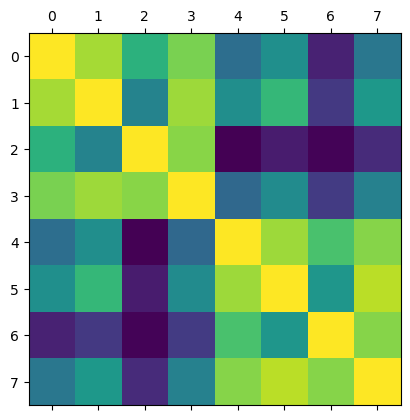

In [24]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

In [80]:
#current dir
cwd = os.getcwd()
cwd

'/Users/amykillin/Desktop/Mark Career Foundry Data/Data Immersion/Topic 6/6.2 - Exploring Relationships'

Text(0.5, 1.0, 'Correlation Matrix')

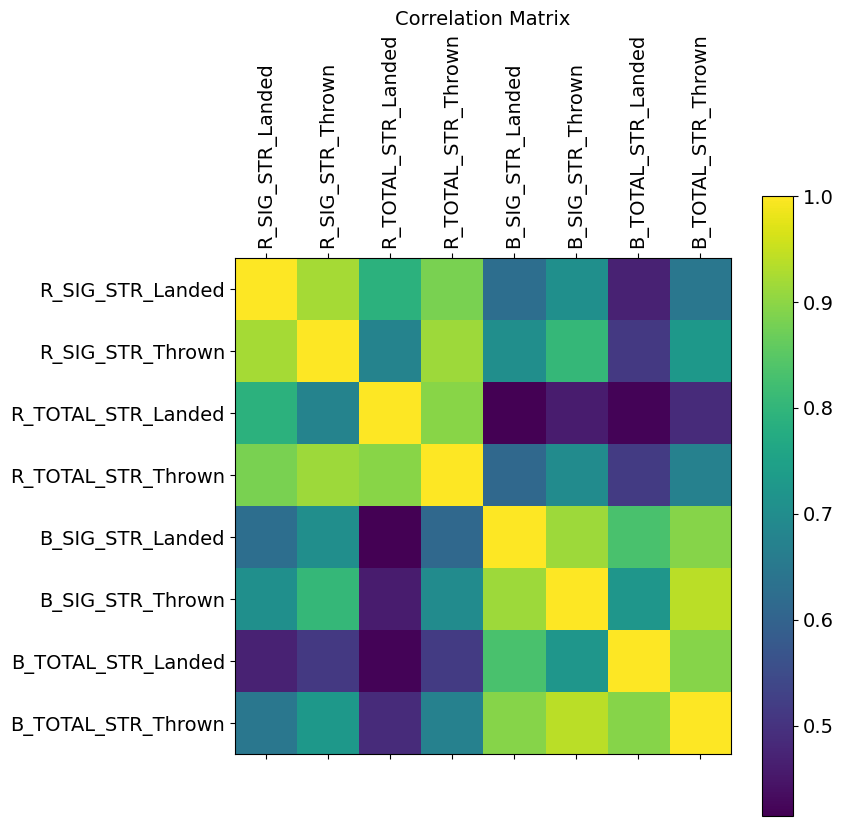

In [25]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [ ]:
# We see the weakest correlation between the red and blue figures e.g. R_SIG_STR_Landed and B_TOTAL_STR_Landed 
#because they essentially have nothing to do with each other. 

#We see a stronger correlation between the more related columns like thrown and landed 
#e.g. R_Total_STR_Thrown and R_Total_STR_Landed


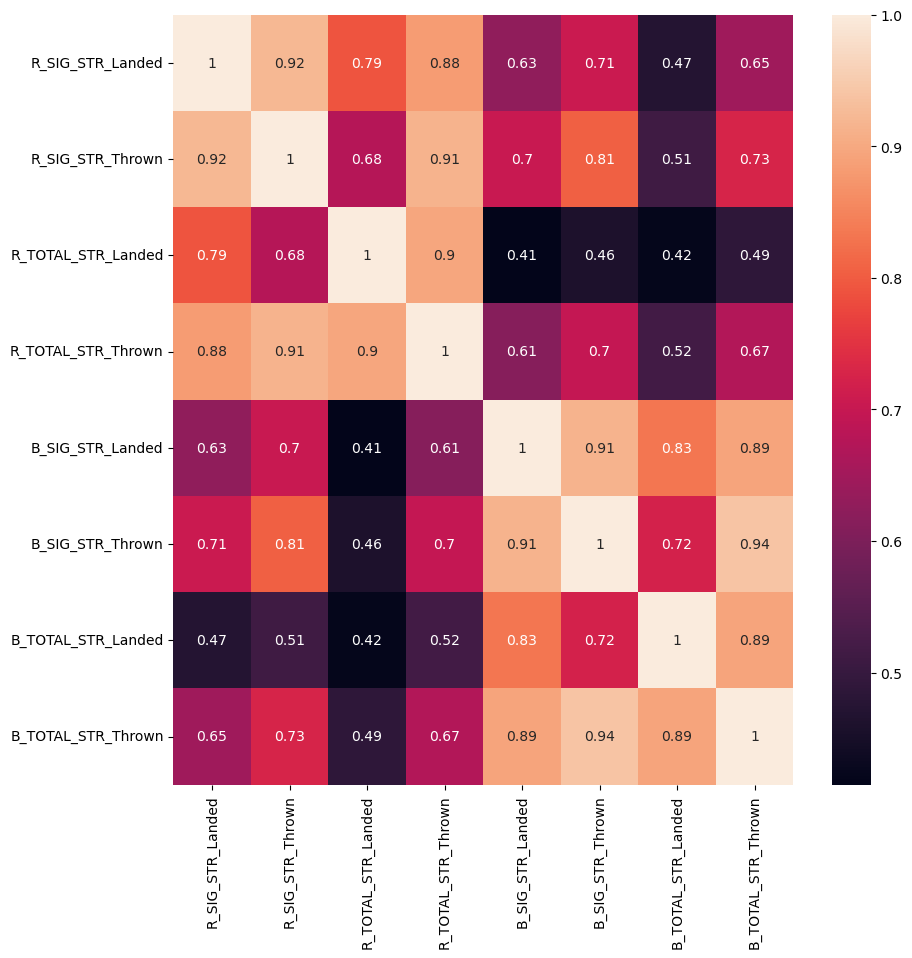

In [26]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [27]:
# Scatterplot

#Will use The total landed Significant Strikes for each blue and red 

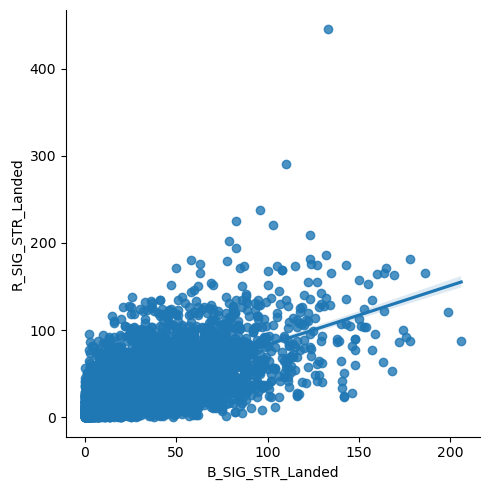

In [29]:
sns.lmplot(x = 'B_SIG_STR_Landed', y = 'R_SIG_STR_Landed', data = df_sub)

In [35]:
# Someone absorbed >400 Significant strikes!

In [31]:
# Keep only the variables you want to use in the pair plot

df_sub_2 = df_sub[['B_SIG_STR_Landed', 'B_SIG_STR_Thrown', 'R_SIG_STR_Landed', 'R_SIG_STR_Thrown']]

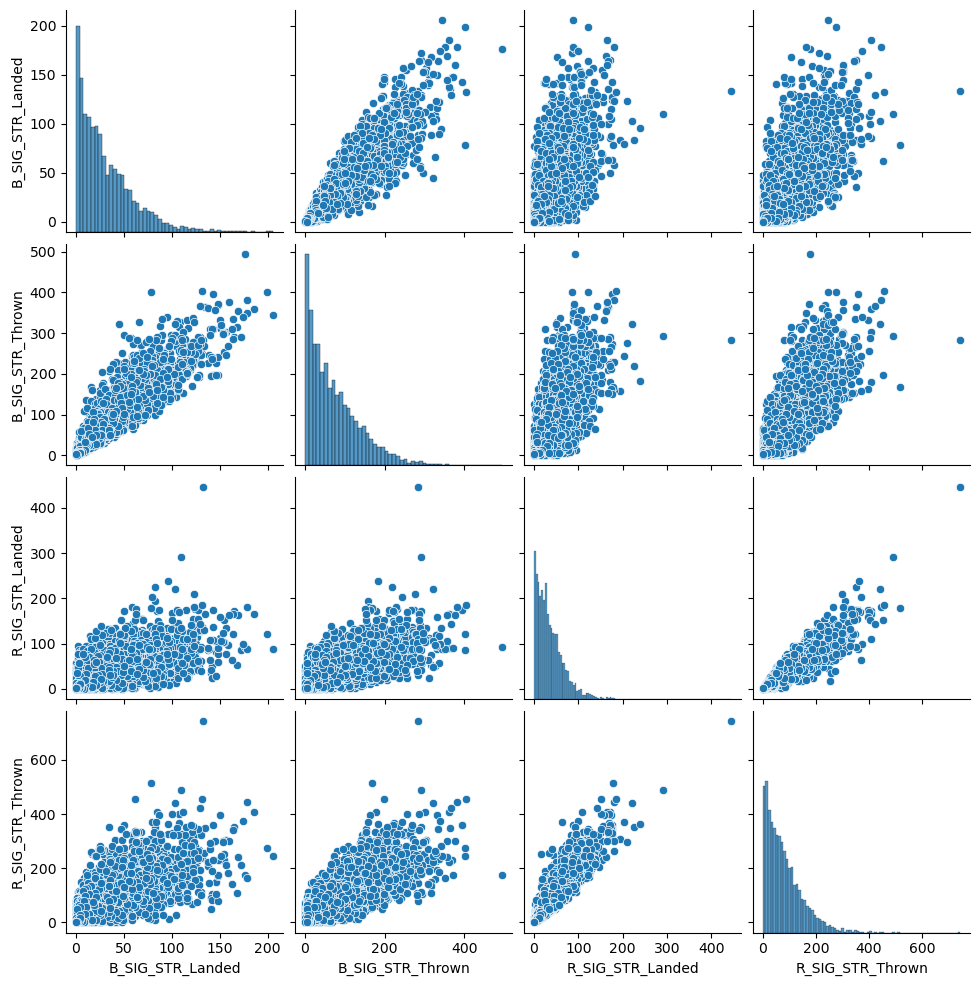

In [32]:
# Create a pair plot 

g = sns.pairplot(df_sub_2)

<Axes: xlabel='win_by', ylabel='Count'>

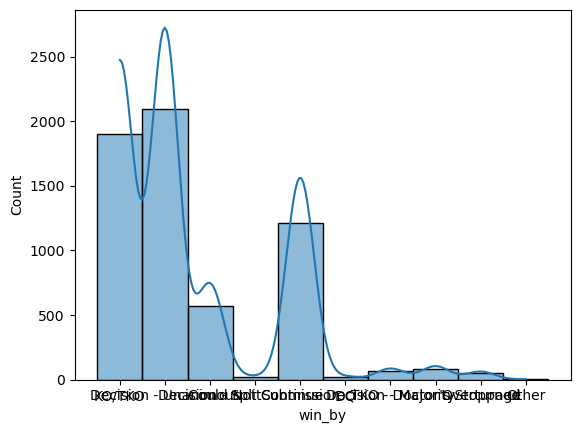

In [58]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['win_by'], bins = 20, kde = True)

<Axes: >

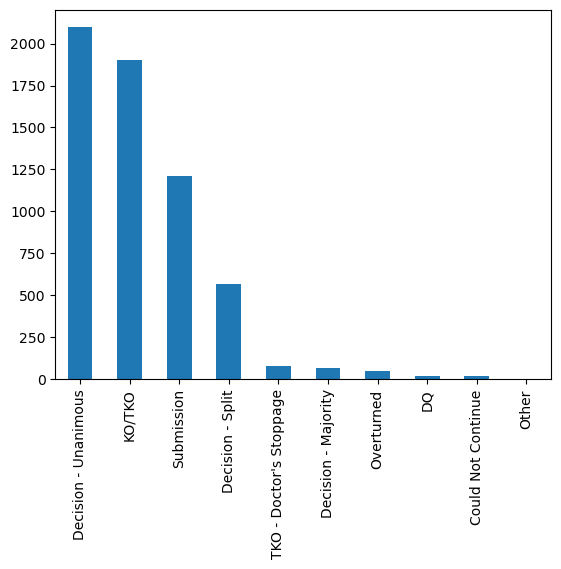

In [55]:
df['win_by'].value_counts().plot.bar()

In [57]:
# This looks a bit better because the axis were overlapping

In [82]:
# Will create a 'total significant strike volume' column adding the R and B significant strikes to use 
# I will compare this against the 'Last Round' column for the catplot i.e. on which round the fight ended.

In [62]:
df['total_sig_stk_R_B'] = (df['B_SIG_STR_Landed']+df['R_SIG_STR_Landed'])
print(df)

          R_fighter           B_fighter  R_KD  B_KD  R_SIG_STR_Landed  \
0      Adrian Yanez       Gustavo Lopez     2     0                41   
1      Trevin Giles       Roman Dolidze     0     0                27   
2       Tai Tuivasa     Harry Hunsucker     1     0                14   
3     Cheyanne Buys   Montserrat Conejo     0     0                31   
4     Marion Reneau       Macy Chiasson     0     0                30   
...             ...                 ...   ...   ...               ...   
6007  Remco Pardoel  Alberta Cerra Leon     0     0                 4   
6008   Orlando Wiet    Robert Lucarelli     0     0                 8   
6009  Johnny Rhodes       David Levicki     0     0                11   
6010  Patrick Smith          Ray Wizard     0     0                 1   
6011   Scott Morris      Sean Daugherty     0     0                 1   

      R_SIG_STR_Thrown  B_SIG_STR_Landed  B_SIG_STR_Thrown  \
0                  103                23                51   

In [73]:
df.loc[df['total_sig_stk_R_B'] < 50, 'Volume Range'] = 'Low Strike Volume'

In [74]:
df.loc[(df['total_sig_stk_R_B'] >= 50) & (df['total_sig_stk_R_B'] < 100), 'Volume Range'] = 'Middle Strike Volume'

In [75]:
df.loc[df['total_sig_stk_R_B'] >= 100, 'Volume Range'] = 'High Strike Volume'

In [76]:
df['Volume Range'].value_counts(dropna = False)

Low Strike Volume       2725
Middle Strike Volume    1945
High Strike Volume      1342
Name: Volume Range, dtype: int64

In [77]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR_Landed',
       'R_SIG_STR_Thrown', 'B_SIG_STR_Landed', 'B_SIG_STR_Thrown',
       'R_TOTAL_STR_Landed', 'R_TOTAL_STR_Thrown', 'B_TOTAL_STR_Landed',
       'B_TOTAL_STR_Thrown', 'R_TD_Secured', 'R_TD_Attempted', 'B_TD_Secured',
       'B_TD_Attempted', 'R_SUB_ATT', 'B_SUB_ATT', 'R_REV', 'B_REV', 'R_CTRL',
       'B_CTRL', 'win_by', 'last_round', 'last_round_time', 'Format', 'date',
       'location', 'Fight_type', 'Winner', 'total_sig_stk_R_B', 'Volume Range',
       'Price category'],
      dtype='object')

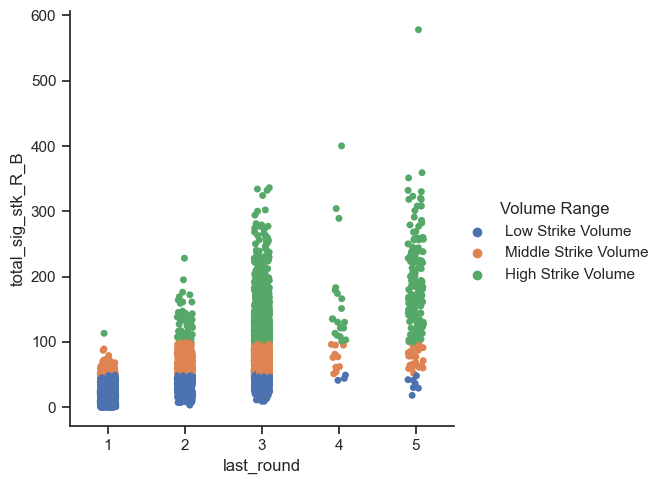

In [78]:
# Create a categorical plot in seaborn using the strike volume categories created above

sns.set(style="ticks")
g = sns.catplot(x="last_round", y="total_sig_stk_R_B", hue="Volume Range", data=df)

In [85]:
#This is for overall sig strikes landed
# Most fights go for three rounds, only main events and title fights go for 5 rounds. 
# This is why 4 & 5 look more sparce
# For 5 round fights, not many of those finish in the 4th round

In [81]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

# Possible Hypotheses

In [87]:
# Fights won by submission will have less sig strikes landed than fights won by KO or TKO
# Fights won by KO or TKO will be in fights where there is a higher sig strike landed volume
# Winners by submission will be in fights where there is more control time